Final weight (w): 251.85076761556974
Final bias (b): 2.0937705415704673


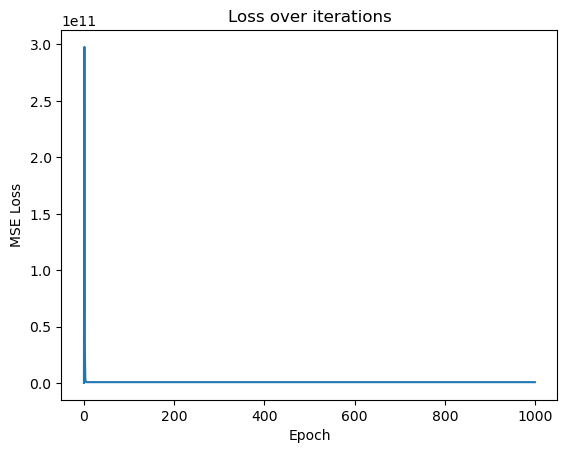

In [6]:
#What is Gradient Descent?
#Gradient Descent is an optimization algorithm used to minimize the cost function (error) in
#machine learning models — especially in linear regression.

import numpy as np
import matplotlib.pyplot as plt

# Training data (area vs price)
X = np.array([1000, 1500, 2000, 2500])  # area
y = np.array([300000, 400000, 500000, 600000])  # price

# Initialize parameters
w = 0
b = 0
alpha = 0.0000001  # learning rate
epochs = 1000
m = len(X)

# Store loss for plotting
loss_history = []

# Gradient Descent loop
for i in range(epochs):
    y_pred = w * X + b
    error = y_pred - y
    
    # Calculate gradients
    dw = (2/m) * np.dot(error, X)
    db = (2/m) * np.sum(error)
    
    # Update parameters
    w -= alpha * dw
    b -= alpha * db
    
    # Compute and store loss
    loss = np.mean(error ** 2)
    loss_history.append(loss)

# Output final values
print(f"Final weight (w): {w}")
print(f"Final bias (b): {b}")

# Plot loss curve
plt.plot(loss_history)
plt.title("Loss over iterations")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()




In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a larger dataset with clear linear relationships
data = {
    'area':    [1000, 1200, 1500, 1600, 1700, 1800, 2000, 2200, 2400, 2600],
    'bedroom': [2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
    'age':     [5, 6, 7, 8, 9, 10, 12, 13, 14, 15],
    'price':   [310000, 330000, 370000, 390000, 410000, 430000, 470000, 490000, 510000, 530000]
}
df = pd.DataFrame(data)

# Step 2: Define features and target
X = df[['area', 'bedroom', 'age']]
y = df['price']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Predict a new house
new_house = pd.DataFrame({'area': [1900], 'bedroom': [3], 'age': [9]})
predicted_price = model.predict(new_house)[0]

# Step 7: Show results
print(" Intercept (bias):", round(model.intercept_, 2))
print(" Coefficients (slopes):", [round(c, 2) for c in model.coef_])
print(" Mean Squared Error (MSE):", round(mse, 2))
print(" R² Score (Model Accuracy):", round(r2, 4))
print(" Predicted price for new house:", round(predicted_price, 2))
print(" Predicted prices on test set:", [round(p, 2) for p in y_pred])


 Intercept (bias): 171250.0
 Coefficients (slopes): [75.0, 10000.0, 8750.0]
 Mean Squared Error (MSE): 31770833.33
 R² Score (Model Accuracy): 0.9927
 Predicted price for new house: 422500.0
 Predicted prices on test set: [375000.0, 537500.0, 466250.0]


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\RF\Desktop\co2.csv"
data = pd.read_csv(file_path)
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\RF\Desktop\co2.csv"
data = pd.read_csv(file_path)

# Select features and target variable
X = data[['Engine Size(L)', 'Cylinders', 
          'Fuel Consumption City (L/100 km)', 
          'Fuel Consumption Hwy (L/100 km)', 
          'Fuel Consumption Comb (L/100 km)']]
y = data['CO2 Emissions(g/km)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (recommended for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score (Accuracy): {r2:.2f}")


Mean Squared Error: 421.86
R^2 Score (Accuracy): 0.88


In [ ]:
#now perform gradient decent to maximize accuracy upto 1 and minimize function error